<a href="https://colab.research.google.com/github/eildes06/02_DS_DATA_SCIENCE/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [2]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


burda hata alinca , error_bad_lines=False kodunu ekledim
https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

In [3]:
df0 = pd.read_csv("/content/drive/MyDrive/analitica/data1.csv", error_bad_lines=False,sep=";")
df= df0.copy()

sep=";" ekleyerek veriyi okuyabildim

Ben normalde analizleri bazi kullandigim def lerim var onlar ile yapiyorum. Ama burda daha acik olsun diye pandas methodlarini kullandim. Alta bir tane normalde kullandigim definitioni ekliyorum.

*def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')*

#EDA

In [4]:
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [5]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [6]:
df.tail()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0
3332,74,415,4004344,no,yes,25,234,40,23,113,266,82,"241,4",77,"10,86","13,7",4,"3,7",0,0


In [7]:
df.shape

(3333, 20)

In [8]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

Datamizin bastan sondan degerlerine ve veri tiplerine yukarda baktiktan sonra, isnull ile null deger olmadigini gorduk.

In [10]:
df.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

account length                          212
location code                             3
user id                                3333
credit card info save                     2
push status                               2
add to wishlist                          46
desktop sessions                        295
app sessions                             60
desktop transactions                     30
total product detail views              119
session duration                        287
promotion clicks                        123
avg order value                        1591
sale product views                      120
discount rate per visited products      933
product detail view per app session     162
app transactions                         21
add to cart per session                 162
customer service calls                   10
churn                                     2
dtype: int64

In [13]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

account length has 212 unique value
location code has 3 unique value
user id has 3333 unique value
add to wishlist has 46 unique value
desktop sessions has 295 unique value
app sessions has 60 unique value
desktop transactions has 30 unique value
total product detail views has 119 unique value
session duration has 287 unique value
promotion clicks has 123 unique value
sale product views has 120 unique value
app transactions has 21 unique value
customer service calls has 10 unique value
churn has 2 unique value


In [14]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.00,101.06,39.82,1.00,74.00,101.00,127.00,243.00
location code,3333.00,437.18,42.37,408.00,408.00,415.00,510.00,510.00
user id,3333.00,3746291.29,274662.57,3271058.00,3508680.00,3748187.00,3985970.00,4229964.00
add to wishlist,3333.00,8.10,13.69,0.00,0.00,0.00,20.00,51.00
desktop sessions,3333.00,179.81,54.46,0.00,144.00,179.00,216.00,351.00
app sessions,3333.00,30.57,9.27,0.00,24.00,31.00,37.00,60.00
desktop transactions,3333.00,17.09,4.32,0.00,14.00,17.00,20.00,31.00
total product detail views,3333.00,100.44,20.07,0.00,87.00,101.00,114.00,165.00
session duration,3333.00,201.04,50.71,0.00,167.00,201.00,235.00,364.00
promotion clicks,3333.00,100.11,19.92,0.00,87.00,100.00,114.00,170.00


datada nokta olmasi gereken ama virgul olan yerler var onlari duzeltiyorum.

In [15]:
df["discount rate per visited products"]=df["discount rate per visited products"].replace(",",".",regex=True).astype(float)

In [16]:
df["product detail view per app session"]=df["product detail view per app session"].replace(",",".",regex=True).astype(float)

In [17]:
df["add to cart per session"]=df["add to cart per session"].replace(",",".",regex=True).astype(float)


In [18]:
df["avg order value"]=df["avg order value"].replace(",",".",regex=True).astype(float)


In [19]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.70,91,11.01,10.00,3,2.70,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.40,103,11.45,13.70,3,3.70,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.60,104,7.32,12.20,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.90,89,8.86,6.60,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.90,121,8.41,10.10,3,2.73,3,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [21]:
df['credit card info save']=df['credit card info save'].map({'no': 0, 'yes': 1})
df['push status']=df['push status'].map({'no': 0, 'yes': 1})

In [22]:
df.tail()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
3328,192,415,4144276,0,1,36,156,27,18,77,216,126,279.10,83,12.56,9.90,6,2.67,2,0
3329,68,415,3703271,0,0,0,231,39,13,57,153,55,191.30,123,8.61,9.60,4,2.59,3,0
3330,28,510,3288230,0,0,0,181,31,25,109,289,58,191.90,91,8.64,14.10,6,3.81,2,0
3331,184,510,3646381,1,0,0,214,36,14,105,160,84,139.20,137,6.26,5.00,10,1.35,2,0
3332,74,415,4004344,0,1,25,234,40,23,113,266,82,241.40,77,10.86,13.70,4,3.70,0,0


# Targetimiz olan churne bakiyoruz 

0    2850
1     483
Name: churn, dtype: int64


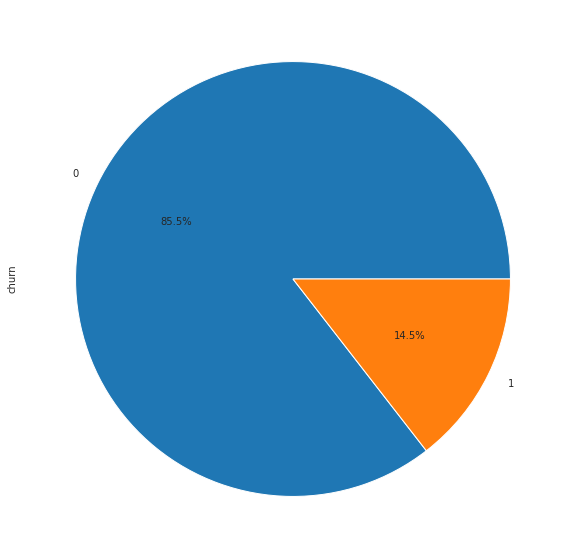

In [23]:
print(df["churn"].value_counts())
df["churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

data imbalance buna bakmamiz lazim. bir scorelarimizi gorelim ona gore devam edelim.

In [24]:
df['churn'].describe()

count   3333.00
mean       0.14
std        0.35
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: churn, dtype: float64

In [25]:
a = round(df['churn'].value_counts()/len(df['churn']),2)
churn_ratio=  pd.DataFrame(a).T 
churn_ratio = churn_ratio.rename(columns={'no':'Not Churn' , 'yes':'Churn'})
churn_ratio 

,0,1
churn,0.86,0.14


Targetimizin featurelar ile iliskisini gorelim

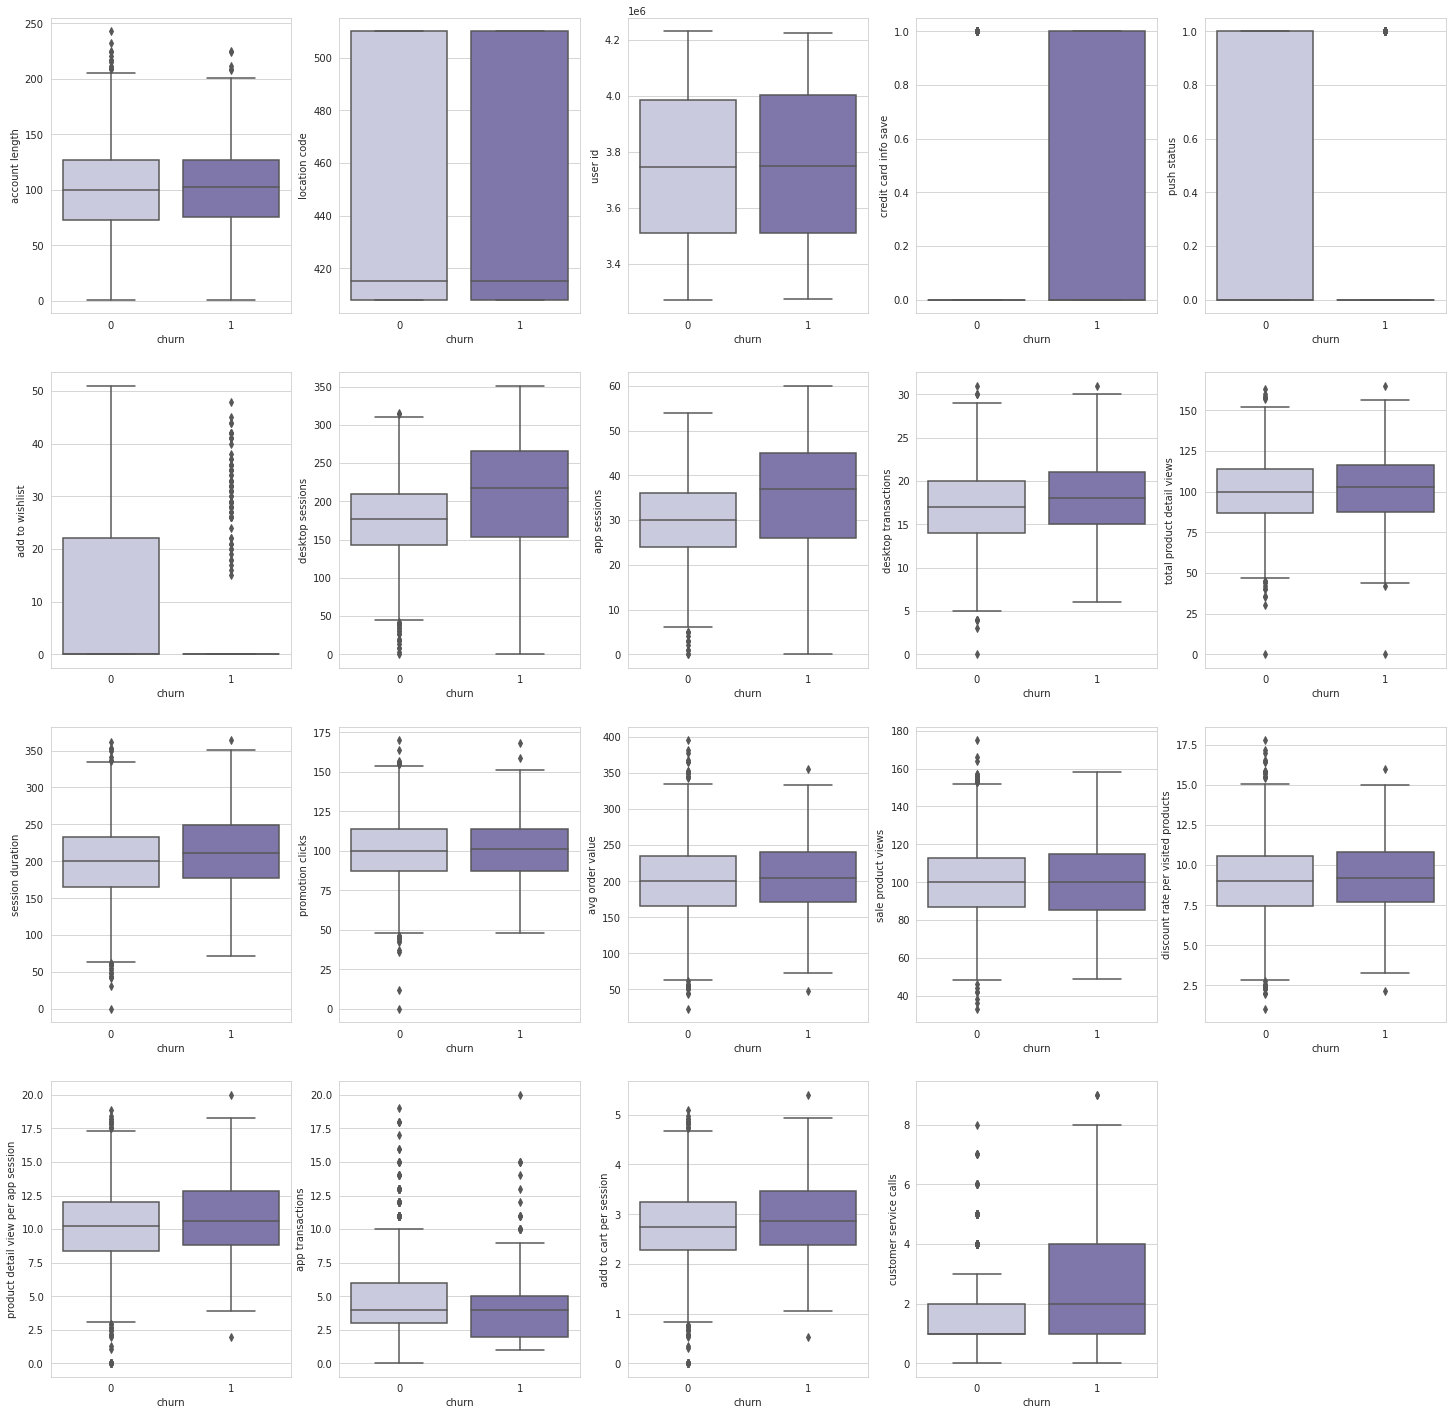

In [26]:
index = 0
plt.figure(figsize=(25,25))
for feature in df:
    if feature != "churn":
        index += 1
        plt.subplot(4, 5, index)
        sns.boxplot(x='churn',palette="Purples",y=feature, data=df)

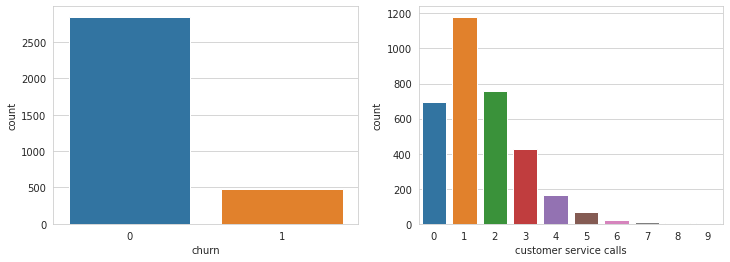

In [27]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="churn", data=df, ax=axes[0])
sns.countplot(x="customer service calls", data=df, ax=axes[1]);

In [28]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

acount length anlamli bir inside vermedigi icin direk drop ettim.

In [29]:
df.drop(columns=['account length'] , axis=1 , inplace=True)

datamiz da hem categoric veri var hemde numerical bunlari inceleme icin ayirdik.

In [30]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<10:
		categ_columns.append(col) 
        
print('categ numericals columns are {}'.format(categ_columns))

Num_cols = ['push status' ,'desktop sessions' ,'total product detail views',
       'app sessions', 'session duration', 'promotion clicks',
       'desktop transactions', 'avg order value', 'sale product views',
       'discount rate per visited products', 'product detail view per app session', 'app transactions',
       'add to cart per session' ]
print('nums numericals columns are {}'.format(Num_cols))

categ numericals columns are ['location code', 'credit card info save', 'push status', 'churn']
nums numericals columns are ['push status', 'desktop sessions', 'total product detail views', 'app sessions', 'session duration', 'promotion clicks', 'desktop transactions', 'avg order value', 'sale product views', 'discount rate per visited products', 'product detail view per app session', 'app transactions', 'add to cart per session']


In [31]:
df.nunique().sort_values()

churn                                     2
push status                               2
credit card info save                     2
location code                             3
customer service calls                   10
app transactions                         21
desktop transactions                     30
add to wishlist                          46
app sessions                             60
total product detail views              119
sale product views                      120
promotion clicks                        123
product detail view per app session     162
add to cart per session                 162
session duration                        287
desktop sessions                        295
discount rate per visited products      933
avg order value                        1591
user id                                3333
dtype: int64

In [32]:
#import matplotlib 
#print('matplotlib: {}'.format(matplotlib.__version__))

In [33]:
#pip install matplotlib --upgrade

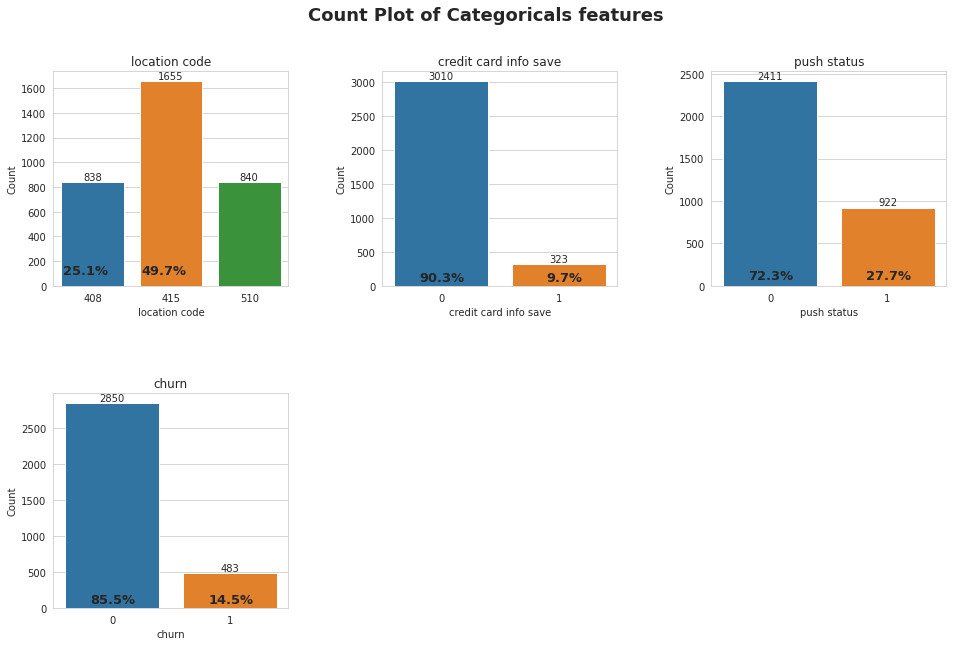

In [34]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

datamizin dagilim grafine baktim.

In [35]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

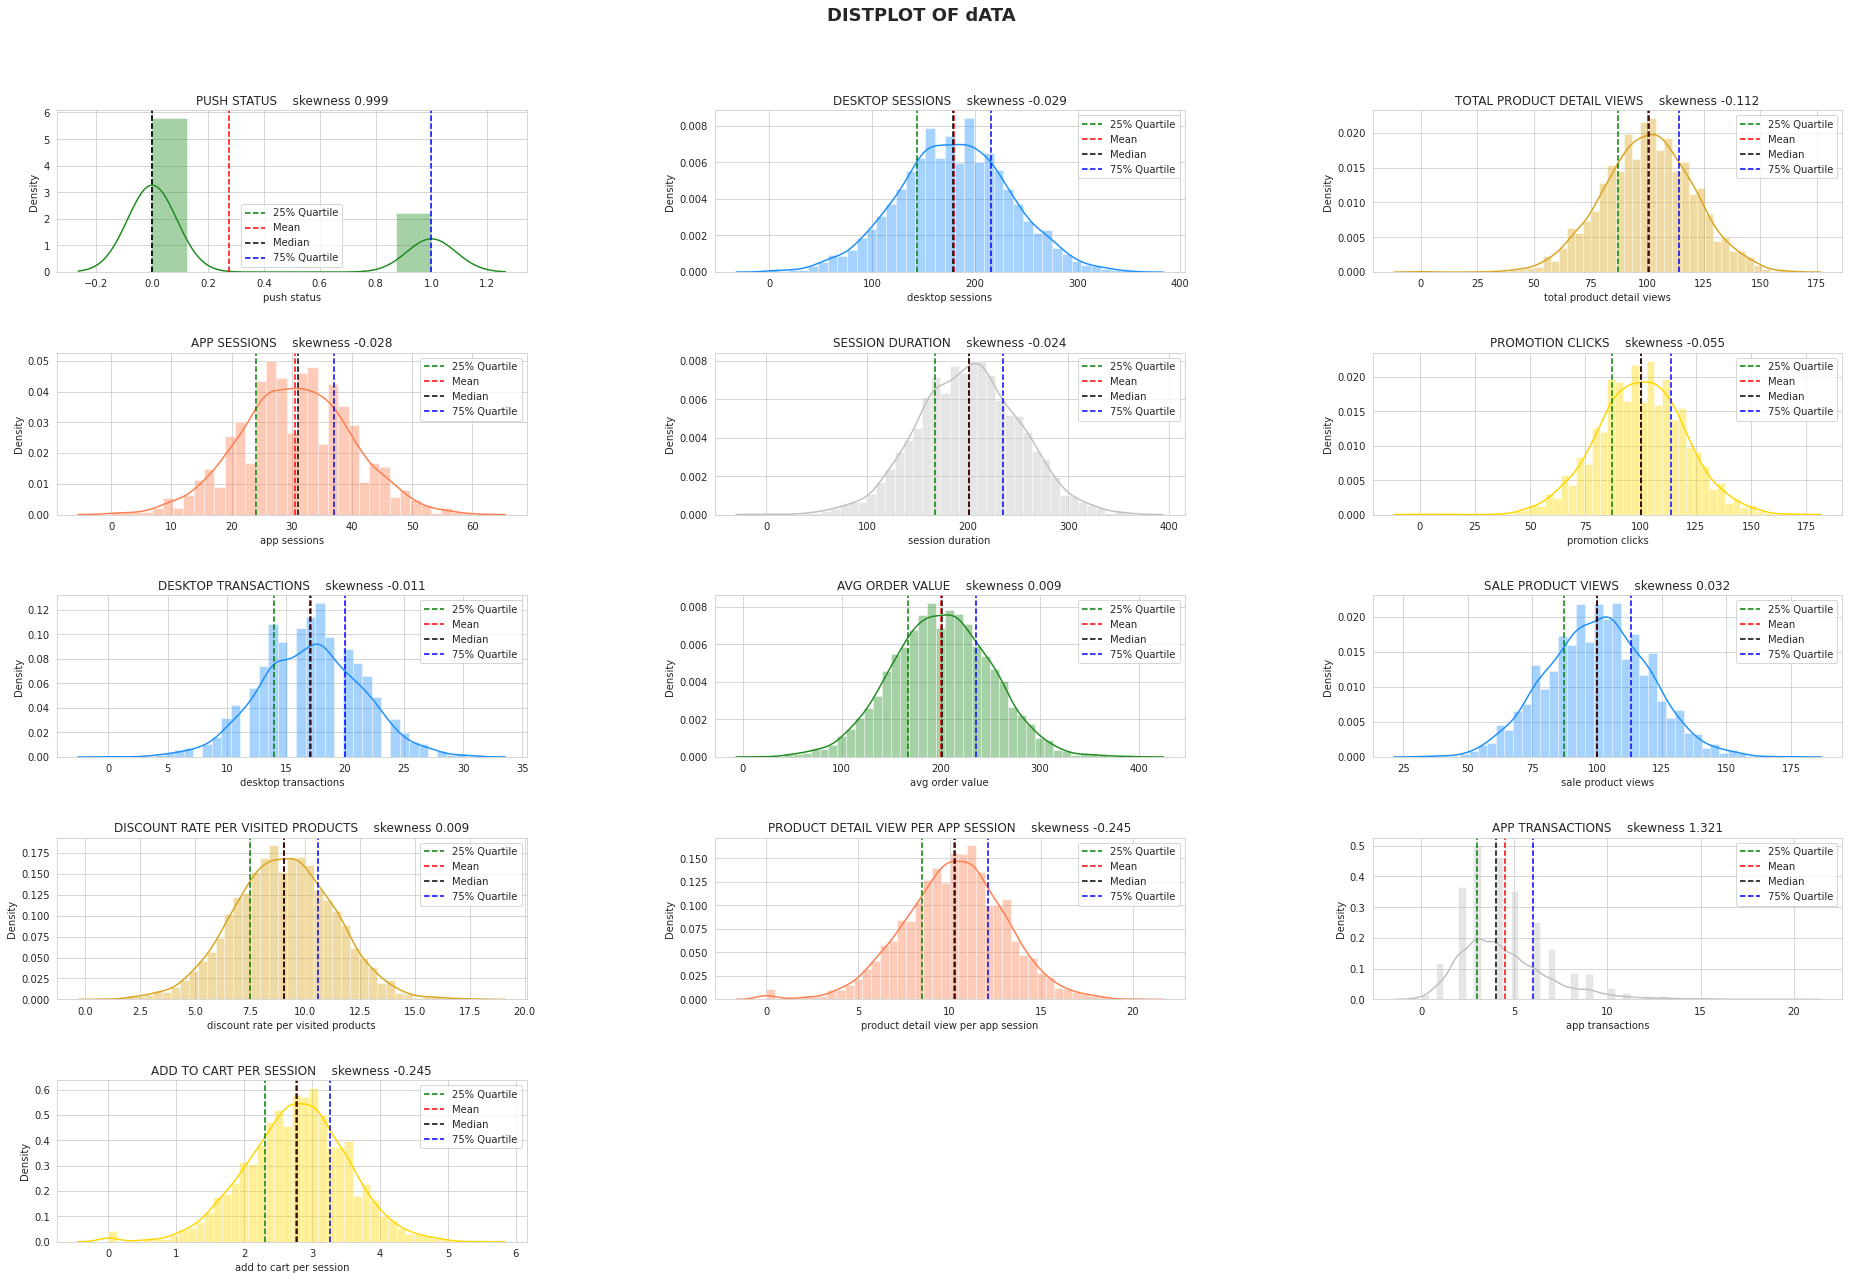

In [36]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col],  color=colours[i]) 
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax.legend(fontsize=10) 

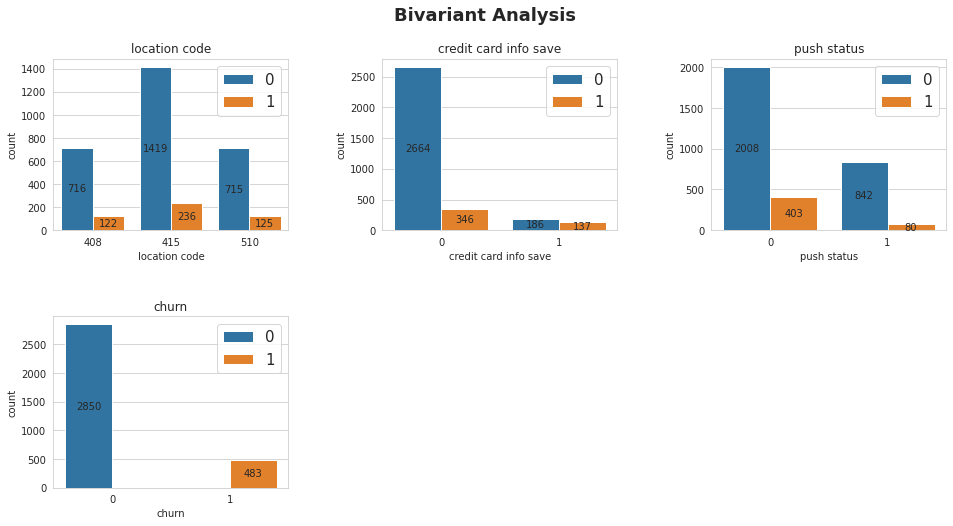

In [37]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['churn'] )
    a.set_title(col)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

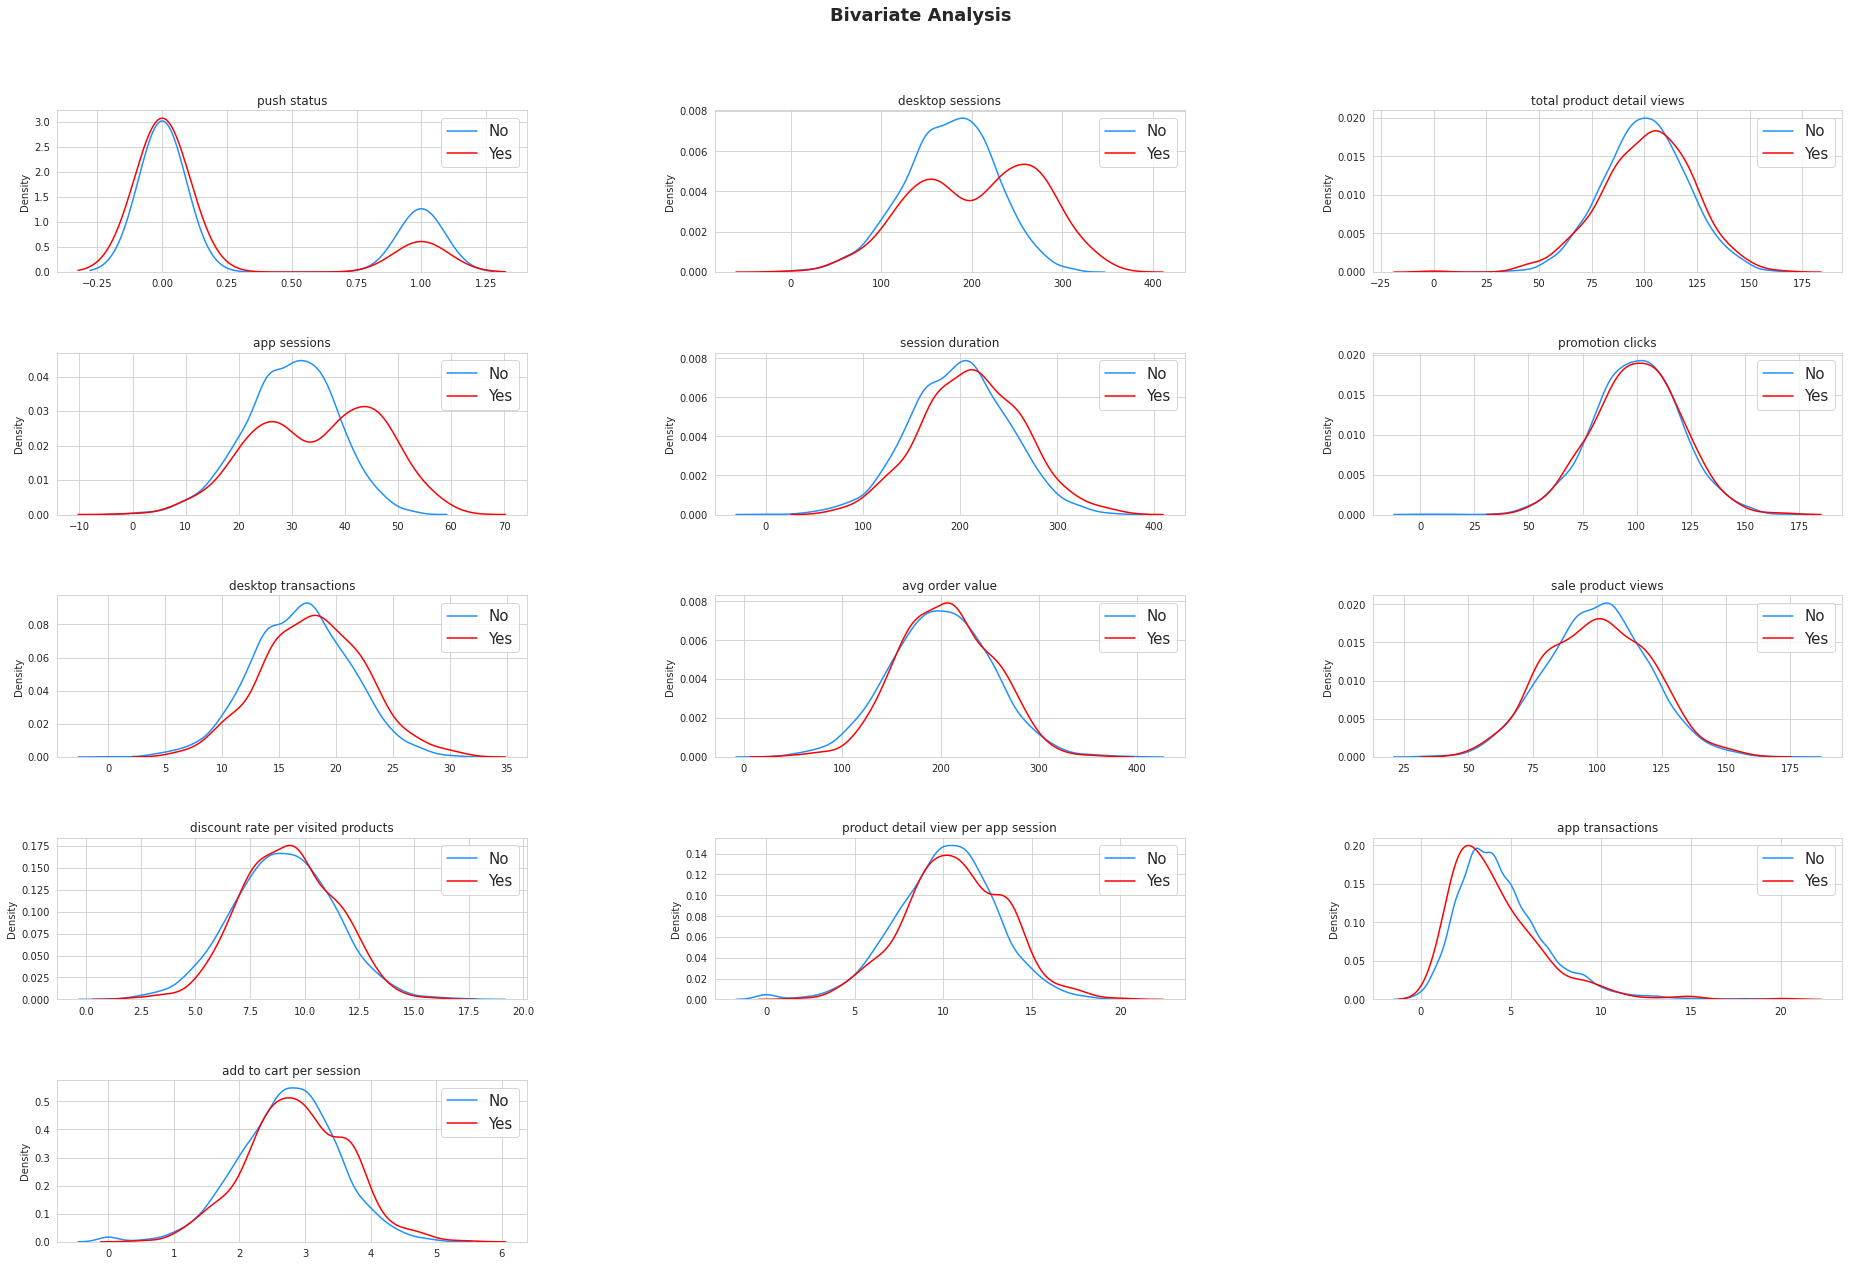

In [38]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)
    
    sns.distplot(x =df[df['churn']==0][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['churn']==1][col],  color='red' , ax=a , hist =False) 
    a.set_title(col)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

oiutlier detection

In [39]:
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

push status                            False
desktop sessions                        True
total product detail views              True
app sessions                            True
session duration                        True
promotion clicks                        True
desktop transactions                    True
avg order value                         True
sale product views                      True
discount rate per visited products      True
product detail view per app session     True
app transactions                        True
add to cart per session                 True
dtype: bool

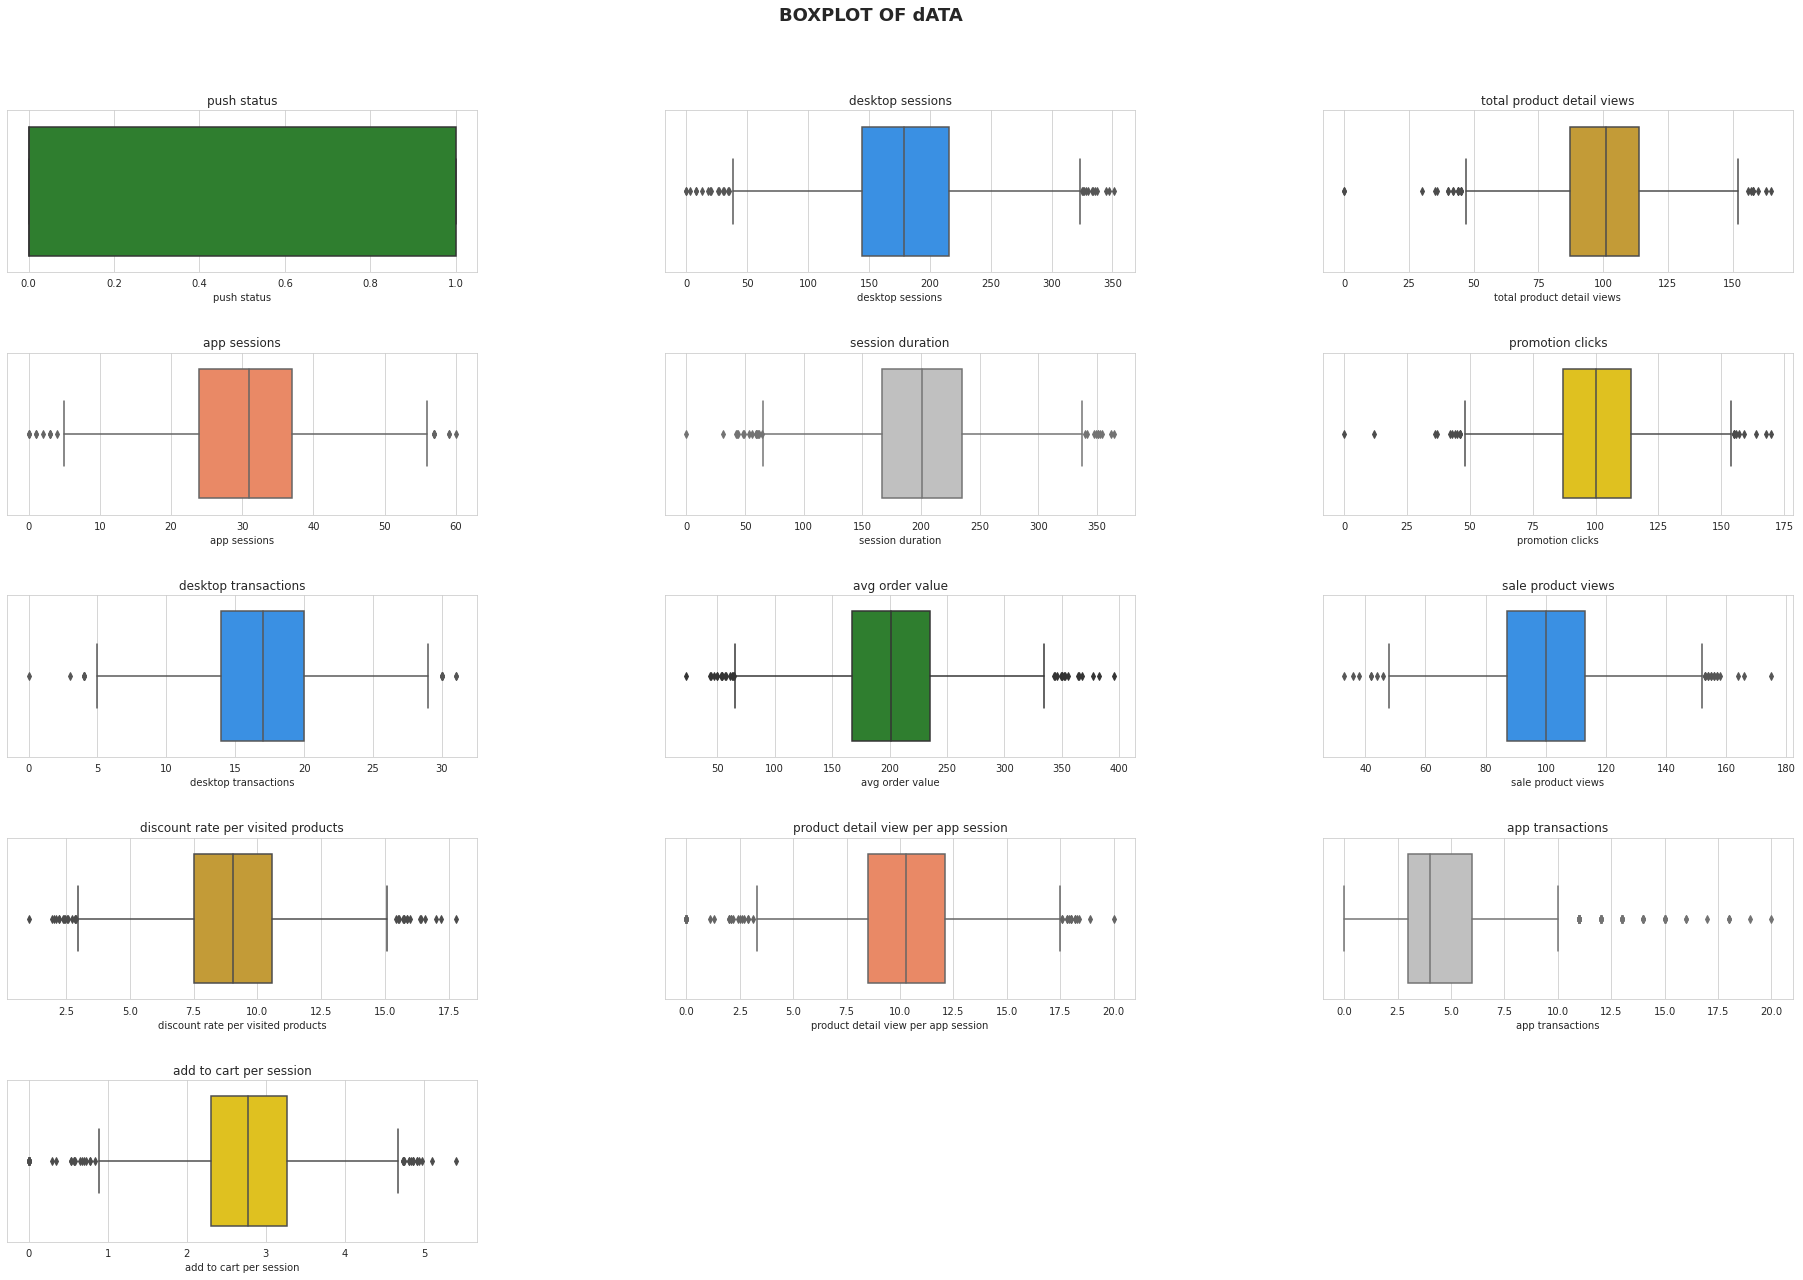

In [40]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

feature engineering

In [41]:
df

,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,415,3824657,0,1,25,265,45,17,110,197,87,244.70,91,11.01,10.00,3,2.70,1,0
1,415,3717191,0,1,26,162,27,17,123,196,103,254.40,103,11.45,13.70,3,3.70,1,0
2,415,3581921,0,0,0,243,41,10,114,121,110,162.60,104,7.32,12.20,5,3.29,0,0
3,408,3759999,1,0,0,299,51,5,71,62,88,196.90,89,8.86,6.60,7,1.78,2,0
4,415,3306626,1,0,0,167,28,13,113,148,122,186.90,121,8.41,10.10,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,4144276,0,1,36,156,27,18,77,216,126,279.10,83,12.56,9.90,6,2.67,2,0
3329,415,3703271,0,0,0,231,39,13,57,153,55,191.30,123,8.61,9.60,4,2.59,3,0
3330,510,3288230,0,0,0,181,31,25,109,289,58,191.90,91,8.64,14.10,6,3.81,2,0
3331,510,3646381,1,0,0,214,36,14,105,160,84,139.20,137,6.26,5.00,10,1.35,2,0


In [43]:
df["push status"].value_counts(dropna=False)

0    2411
1     922
Name: push status, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location code                        3333 non-null   int64  
 1   user id                              3333 non-null   int64  
 2   credit card info save                3333 non-null   int64  
 3   push status                          3333 non-null   int64  
 4   add to wishlist                      3333 non-null   int64  
 5   desktop sessions                     3333 non-null   int64  
 6   app sessions                         3333 non-null   int64  
 7   desktop transactions                 3333 non-null   int64  
 8   total product detail views           3333 non-null   int64  
 9   session duration                     3333 non-null   int64  
 10  promotion clicks                     3333 non-null   int64  
 11  avg order value               

Burda feature enginering ile kendi aralarinda anlamli buldugum sutunlari birlestirip yeni birer sutun elde ettim. 
eski sutunlari drop ettim.
Datamda bana anlamli deger vermeyen tamamen unique olan "user id" ile burda isime yaramayan "location code" da drop ettim.

In [45]:
df['minutes'] = df['desktop sessions'] + df['session duration'] + df['avg order value']
df['calls'] = df['total product detail views'] + df['promotion clicks'] + df['sale product views']
df['charge'] = df['app sessions'] + df['desktop transactions'] + df['discount rate per visited products']



df.drop(columns= ['user id', 'location code'], inplace= True)

In [46]:
df.drop(columns=['app sessions', 'desktop transactions','discount rate per visited products',
                'total product detail views','promotion clicks', 'sale product views', 'desktop sessions', 
                 'session duration', 'avg order value'], inplace=True)

In [47]:
# df["credit card info save"]=df["credit card info save"].replace(",",".",regex=True).astype(float)

In [48]:
df.head() 

,credit card info save,push status,add to wishlist,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,minutes,calls,charge
0,0,1,25,10.00,3,2.70,1,0,706.70,288,73.01
1,0,1,26,13.70,3,3.70,1,0,612.40,329,55.45
2,0,0,0,12.20,5,3.29,0,0,526.60,328,58.32
3,1,0,0,6.60,7,1.78,2,0,557.90,248,64.86
4,1,0,0,10.10,3,2.73,3,0,501.90,356,49.41


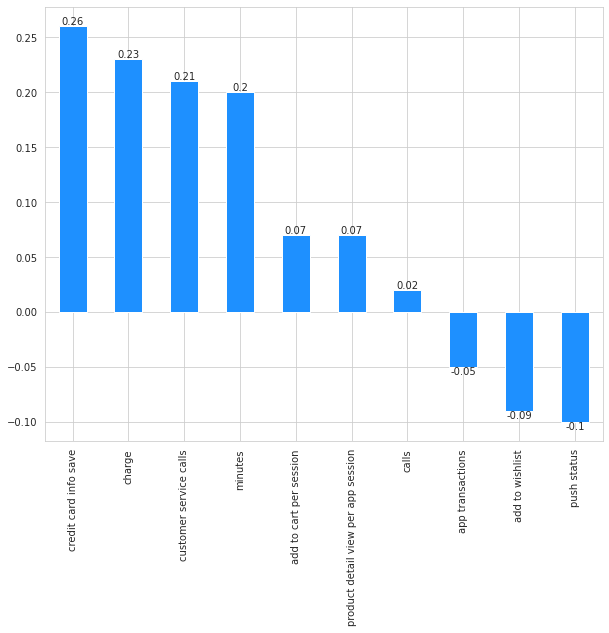

In [49]:
ax = round(df.corr()['churn'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (10,8))
ax.bar_label(ax.containers[0])
plt.show() 

Yukarida featurelarimin chrurnumu nasil etkileme sekillerine (+,-) ve miktarlarini gordum.

Asagida datanin corelation matrixine bakip bir biriyle iliskili feature var mi yok mu baktim.

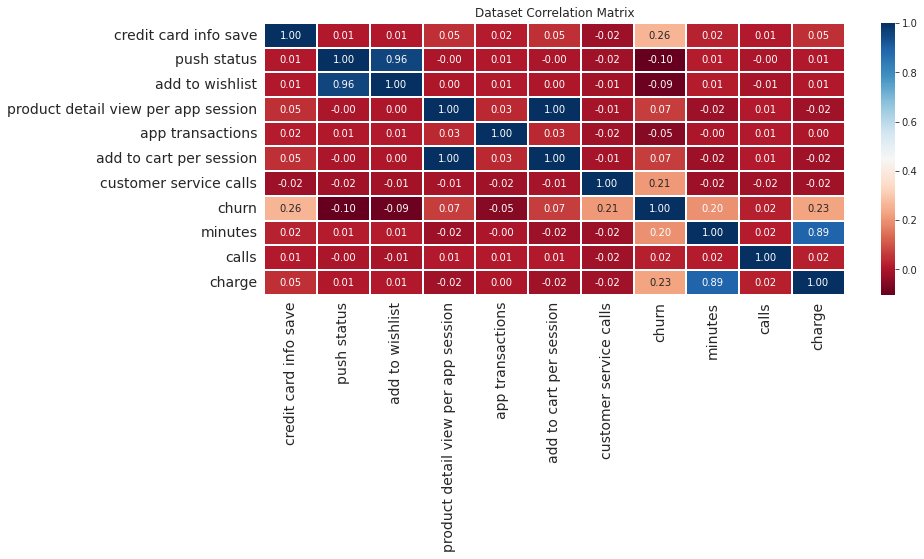

In [50]:
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show() 

 # preprocessing 


Machine learning algortmasi icin kutuphaneleri yukledim. Normalde ben bunlari en basta yukluyorum ama burda  kutuphaneler belli olsun diye ayri ayri yukledim.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [52]:
X = df.drop('churn' , 1 )
y = df['churn'] 

In [53]:
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.20 , random_state = 42)

 Burda taskde istendigi icin algoritma oncesi Recursive Feature elimation ile onemli ve onemsiz featurelari belirledim.

#Recursive feature elimination

In [54]:
rfe = RFE(RandomForestClassifier(), n_features_to_select = 7, step = 1)

rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=7)

In [55]:
selected = X_train.columns[rfe.support_]

In [56]:
rfe.ranking_

array([1, 4, 1, 1, 1, 2, 1, 1, 3, 1])

In [57]:
X_train = X_train[selected]
X_test = X_test[selected]

In [58]:
X_train

,credit card info save,add to wishlist,product detail view per app session,app transactions,customer service calls,minutes,charge
817,0,0,6.60,6,2,524.20,41.89
1373,0,0,4.10,4,4,514.90,44.40
679,1,0,8.70,9,1,757.00,75.36
56,0,0,8.00,2,1,447.80,43.34
1993,0,0,4.50,3,0,696.00,69.63
...,...,...,...,...,...,...,...
1095,0,0,6.00,3,1,633.80,71.24
1130,0,0,12.70,2,1,467.60,32.32
1294,0,0,9.20,5,1,534.60,45.31
860,0,0,9.90,6,2,582.60,55.29


Ben burda recursive feature selection sonucunda 7 tane feature secmesini istedim. Ama ben bunu modelime uygulamadim modeliminde feature selectionlarini gormek istedim ve recursive feature selection ile ayni sonuc verip vermedigini gormek istedim.(eger recursive ile devam etseydim {# dfn= df.drop(' hgshdgsd' , 1 ) dfn gibi yeni bir data olusturup gereksiz gorduklerimi (recursive den gelen bilgiler isiginda) dusecegim sutunlari yazardim
split kismina yeni dfn mi yazardim....

In [59]:
from sklearn.model_selection import train_test_split

Once 0,8 train ile calisalim

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling and Model Performance

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Veee Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[565   1]
 [ 18  83]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       566
           1       0.99      0.82      0.90       101

    accuracy                           0.97       667
   macro avg       0.98      0.91      0.94       667
weighted avg       0.97      0.97      0.97       667


Train_Set
[[2284    0]
 [   0  382]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2284
           1       1.00      1.00      1.00       382

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

In [66]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.97
train_accuracy          1.00
test_precision_micro    0.97
train_precision_micro   1.00
test_recall_micro       0.97
train_recall_micro      1.00
test_f1_micro           0.97
train_f1_micro          1.00
dtype: float64

In [67]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
charge,0.32
customer service calls,0.15
minutes,0.11
credit card info save,0.10
app transactions,0.07
product detail view per app session,0.06
add to cart per session,0.06
add to wishlist,0.05
calls,0.05
push status,0.04


0,2 lik test datasinin random forest feature scorelarina gore bizim chrunmuzu en cok etkileyen charge feturemizdir. ve digerleri gorseldeki ve tablodaki gibidir.

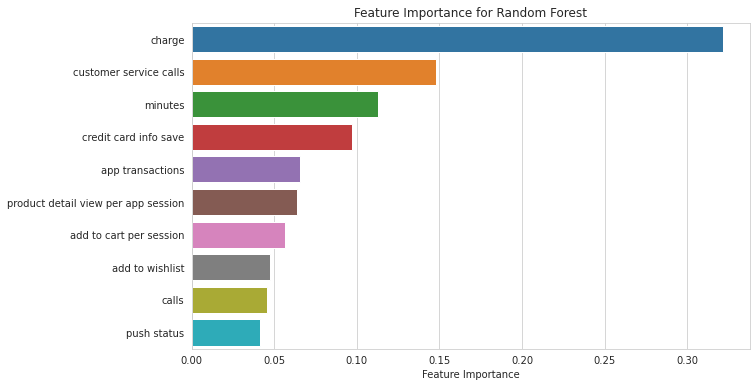

In [68]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

HyperParameters

In [72]:
from sklearn.tree import plot_tree

def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
 

In [73]:
pruned_tree = RandomForestClassifier()
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
report_model(pruned_tree)



Test Set
[[565   1]
 [ 18  83]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       566
           1       0.99      0.82      0.90       101

    accuracy                           0.97       667
   macro avg       0.98      0.91      0.94       667
weighted avg       0.97      0.97      0.97       667



Train Set
[[2284    0]
 [   0  382]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2284
           1       1.00      1.00      1.00       382

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



### Prediction 

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit card info save,3333.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
push status,3333.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
add to wishlist,3333.00,8.10,13.69,0.00,0.00,0.00,20.00,51.00
product detail view per app session,3333.00,10.24,2.79,0.00,8.50,10.30,12.10,20.00
app transactions,3333.00,4.48,2.46,0.00,3.00,4.00,6.00,20.00
add to cart per session,3333.00,2.76,0.75,0.00,2.30,2.78,3.27,5.40
customer service calls,3333.00,1.56,1.32,0.00,1.00,1.00,2.00,9.00
churn,3333.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
minutes,3333.00,581.72,89.97,274.80,521.40,583.40,642.60,877.10
calls,3333.00,300.65,34.33,188.00,278.00,301.00,324.00,410.00


## Evaluating ROC Curves and AUC

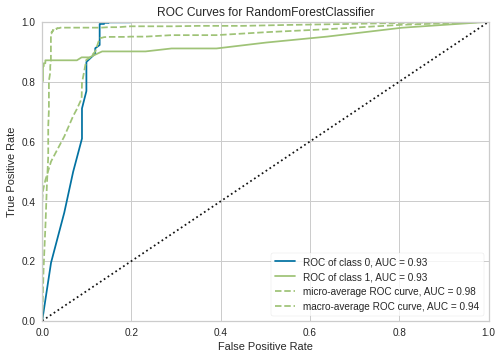

In [76]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [77]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)

butun data taransin diye birde sonuclarimiza cross validation ile baktik.

__Cross Validate__

In [78]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    0.97
test_precision   0.96
test_recall      0.81
test_f1          0.88
dtype: float64

#Grid Search

Grid search ile hyperparamater tuningleri belirleriz. Yuakrda olusan overfit grid search ile engellendi.

In [79]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [80]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [81]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 64}

In [82]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[551  15]
 [ 13  88]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       566
           1       0.85      0.87      0.86       101

    accuracy                           0.96       667
   macro avg       0.92      0.92      0.92       667
weighted avg       0.96      0.96      0.96       667


Train_Set
[[2214   70]
 [  56  326]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2284
           1       0.82      0.85      0.84       382

    accuracy                           0.95      2666
   macro avg       0.90      0.91      0.91      2666
weighted avg       0.95      0.95      0.95      2666



In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

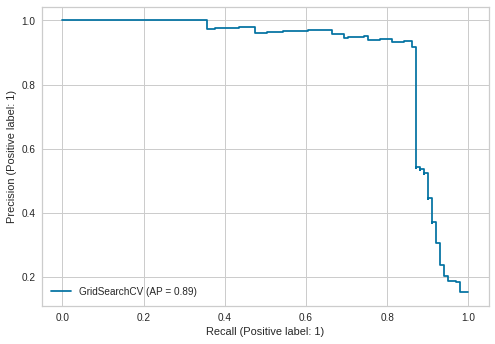

In [85]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

simdi Once 0,6  train ile calisalim

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Modelling and Model Performance

In [88]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Veee Random Forest

In [89]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1136    2]
 [  34  162]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1138
           1       0.99      0.83      0.90       196

    accuracy                           0.97      1334
   macro avg       0.98      0.91      0.94      1334
weighted avg       0.97      0.97      0.97      1334


Train_Set
[[1712    0]
 [   0  287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1712
           1       1.00      1.00      1.00       287

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



In [90]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.97
test_precision_micro   0.97
test_recall_micro      0.97
test_f1_micro          0.97
dtype: float64

In [91]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
charge,0.31
customer service calls,0.14
minutes,0.11
credit card info save,0.09
app transactions,0.07
product detail view per app session,0.06
add to cart per session,0.06
add to wishlist,0.06
calls,0.05
push status,0.05


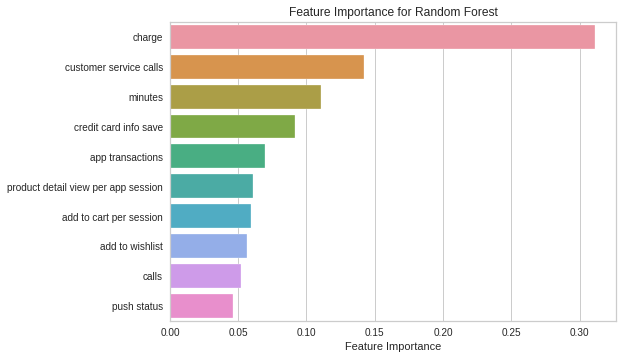

In [92]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

HyperParameters

In [93]:
from sklearn.tree import plot_tree

def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
   

In [94]:
pruned_tree = RandomForestClassifier()
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
report_model(pruned_tree)



Test Set
[[1136    2]
 [  34  162]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1138
           1       0.99      0.83      0.90       196

    accuracy                           0.97      1334
   macro avg       0.98      0.91      0.94      1334
weighted avg       0.97      0.97      0.97      1334



Train Set
[[1712    0]
 [   0  287]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1712
           1       1.00      1.00      1.00       287

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



Evaluating ROC Curves and AUC

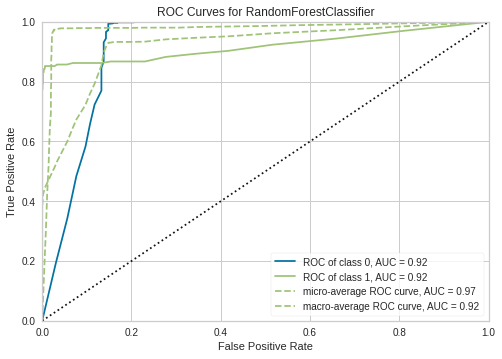

In [96]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [97]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)

Cross Validate

In [98]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    0.97
test_precision   0.96
test_recall      0.81
test_f1          0.88
dtype: float64

Grid Search

In [99]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [100]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [101]:
rf_grid_model.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [102]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1095   43]
 [  29  167]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1138
           1       0.80      0.85      0.82       196

    accuracy                           0.95      1334
   macro avg       0.88      0.91      0.90      1334
weighted avg       0.95      0.95      0.95      1334


Train_Set
[[1658   54]
 [  40  247]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1712
           1       0.82      0.86      0.84       287

    accuracy                           0.95      1999
   macro avg       0.90      0.91      0.91      1999
weighted avg       0.95      0.95      0.95      1999



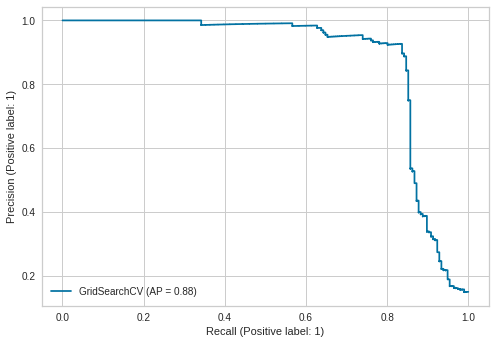

In [103]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

0.6 ve 0.8 train size’ları karşılaştırınız. Modelin görselini paylaşınız.

Her iki durum icinde scorelar benzerdir. Gorseller yukarda cikartilmistir.

#Maksimum Kar Algoritması

In [104]:
from collections import deque


def max_profit(prices):
    max = 0
    prices = deque(prices)
    buy_price = prices.popleft()


    for price in prices:


        if price < buy_price:
            buy_price = price


        else:
            profit = price - buy_price


            if profit > max:
                max = profit


    if max:
        return max
    else:
        return -1


prices = [10,9,8,7,6,5,4]
max_profit = max_profit(prices)
print(max_profit)

-1


#Grup Toplamları Algoritması

Input = ["B:-1", "A:1", "B:3", "A:5"] Output = [“A:6”,”B:2”]
Yukardaki gibi bir dictionnaryde işlem yapıp her key için aşağıdaki gibi alfabetik sıra ile bir toplam veren Gruptoplam(dict)
fonksiyonu tanımlayınız.
Şayet value toplamları 0 ise o key’i outputtan exclude ediniz.

In [142]:
Input = ["B:-1", "A:1", "B:3", "A:5"]

In [143]:
A=[]
B=[]
for i in Input:
    i.split()
    if i[0]=="A":
        A.append(i[-2:])
    else:
        B.append(i[-2:])
A=[s.strip(':') for s in A]
B=[s.strip(':') for s in B]
x=sum(int(k) for k in A)
y=sum(int(l) for l in B)
print("[\"A: {0}\", \"B: {1}\"]".format(x,y))

["A: 6", "B: 2"]


#Research & Social Science Skills:

**1- Kullanılacak data = data2.xlsx**

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
dfk = pd.read_excel("/content/drive/MyDrive/analitica/data2.xlsx")
df1= dfk.copy()

In [110]:
df1

,CITY,ZIPCODE,SCH_NAME,SCH_TYPE
0,East Boston,2128,Guild Elementary,ES
1,East Boston,2128,Kennedy Patrick Elem,ES
2,East Boston,2128,Otis Elementary,ES
3,East Boston,2128,O'Donnell Elementary,ES
4,East Boston,2128,East Boston High,HS
...,...,...,...,...
126,Roxbury,2119,Higginson Elementary (K1-2),ES
127,East Boston,2128,Alighieri Montessori,ES
128,Boston,2116,Boston Adult Tech Acad,Special
129,Brighton,2135,Boston Green Academy,2006-07-12 00:00:00


In [109]:
df1.shape

(131, 4)

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CITY      131 non-null    object
 1   ZIPCODE   131 non-null    int64 
 2   SCH_NAME  131 non-null    object
 3   SCH_TYPE  131 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.2+ KB


In [112]:
df1.isnull().sum()

CITY        0
ZIPCODE     0
SCH_NAME    0
SCH_TYPE    0
dtype: int64

In [113]:
df1.ZIPCODE.value_counts().sort_values() 

2111     1
2215     2
2113     2
2134     3
2115     3
2118     3
2129     4
2120     4
2116     5
2126     6
2125     6
2122     6
2127     6
2121     7
2131     7
2136     7
2135     7
2132     7
2124     9
2130    11
2128    11
2119    14
Name: ZIPCODE, dtype: int64

**a.Public School : Amerika Birleşik Devletleri’ndeki posta kodları 5-digit idir. Bu veri setinde neden 4-digit posta kodları
görmekteyiz? Araştırınız.**

Python 3'te sayılarda baştaki sıfırlara izin verilmez. Asagi da bir ornek denenmistir.

ABD'de çoğu doğu kıyısında yer alan sıfırla başlayan 3.669 posta kodu vardır.
Bizim datamizin bulundugu bolgedeki kodlar da 0 ile basladigi icin burda 4 haneli posta kodu kullanilmistir. Yani orjinallerinin basinda 0 vardir.
Sayisal degerde excelde bastaki 0 i almiyor. 

In [114]:
z = 050
type(z) 

SyntaxError: ignored

**b.School Type veri setinin diğer satırlarında okul türü kodu görüyorken son satırında neden bir tarih formatı görmekteyiz.
Araştırınız.**

Burda aslinda 7 yerde tarih formatini gormekteyiz. "https://www.bostonpublicschools.org/Page/628" verilerine bakildiginda bu okullarin grade kisimlarinin(Grades Offered: 9-12) yani datadaki "SCH_TYPE" kisimlari 7-12 gibi yazilmis. excel de bunlari tarih gibi yorumluyor ve pythonda datayi cekerken ona gore cikti veriyor.

In [115]:
df1.SCH_TYPE.value_counts().sort_values() 

ELC                     5
MS                      6
K-12                    6
2006-07-12 00:00:00     7
Special                11
HS                     19
K-8                    35
ES                     42
Name: SCH_TYPE, dtype: int64

In [128]:
df1[df1["SCH_TYPE"] == "2006-07-12 00:00:00 "]

,CITY,ZIPCODE,SCH_NAME,SCH_TYPE


In [119]:
df1[df1["SCH_TYPE"] == "MS"]

,CITY,ZIPCODE,SCH_NAME,SCH_TYPE
11,Charlestown,2129,Edwards Middle,MS
30,South Boston,2127,UP Academy Boston,MS
35,Roxbury,2119,Timilty Middle,MS
44,Dorchester,2121,Frederick Pilot Middle,MS
71,Roslindale,2131,Irving Middle,MS
113,Dorchester,2125,McCormack Middle,MS


**c.Police veri setindeki tüm korelasyonlara yazdırınız. En yüksek korelasyon olan iki değişkenin arasındaki korelasyonun türünü
belirtiniz ve bu ilişkiyi bir chart ile de gösteriniz.**

https://bjs.ojp.gov/content/pub/pdf/fleo16st.pdf

In [8]:
table_MN = pd.read_html('https://www.governing.com/archive/police-officers-per-capita-rates-employment-for-city-departments.html')

In [9]:
table_MN 

[  Jurisdiction Population  Average Officers Per 10k Population  \
 0           25,000-50,000                               17.000   
 1          50,000-100,000                               16.100   
 2         100,000-200,000                               15.900   
 3         200,000-500,000                               18.700   
 4                500,000+                               24.300   
 5         All over 25,000                               16.800   
 
    Average Total Personnel Per 10k Population  Number of Departments  
 0                                      21.200                    773  
 1                                      20.700                    433  
 2                                      20.900                    171  
 3                                      24.500                     76  
 4                                      30.800                     32  
 5                                      21.400                   1485  ,
   Jurisdiction Populati

Veriyi cektigimizde 4 tane tablo gelmektedir. bunlarin tek tek corelasyonuna bakabiliriz(hangisinin istendigi bildirilmedigi icin ) 

In [12]:
table_MN[0]

,Jurisdiction Population,Average Officers Per 10k Population,Average Total Personnel Per 10k Population,Number of Departments
0,"25,000-50,000",17.000,21.200,773
1,"50,000-100,000",16.100,20.700,433
2,"100,000-200,000",15.900,20.900,171
3,"200,000-500,000",18.700,24.500,76
4,"500,000+",24.300,30.800,32
5,"All over 25,000",16.800,21.400,1485


In [17]:
table_MN[0].corr()

,Average Officers Per 10k Population,Average Total Personnel Per 10k Population,Number of Departments
Average Officers Per 10k Population,1.000,0.994,-0.437
Average Total Personnel Per 10k Population,0.994,1.000,-0.499
Number of Departments,-0.437,-0.499,1.000


In [13]:
table_MN[1]

,Jurisdiction Population,Median Officers Per 10k Population,Median Total Personnel Per 10k Population,Number of Departments
0,"25,000-50,000",16.100,20.200,773
1,"50,000-100,000",15.600,19.700,433
2,"100,000-200,000",14.300,19.400,171
3,"200,000-500,000",16.900,21.100,76
4,"500,000+",20.700,26.800,32
5,"All Over 25,000",15.900,20.200,1485


In [18]:
table_MN[1].corr()

,Median Officers Per 10k Population,Median Total Personnel Per 10k Population,Number of Departments
Median Officers Per 10k Population,1.000,0.976,-0.336
Median Total Personnel Per 10k Population,0.976,1.000,-0.404
Number of Departments,-0.336,-0.404,1.000


In [14]:
table_MN[2]

,Police Department,Officers per 10K Population,Officers,Total Employees per 10K Population,Total Employees
0,"New York, New York",42.300,36228,60.000,51399
1,"Los Angeles, California",24.600,9850,31.700,12692
2,"Chicago, Illinois",43.900,11954,48.200,13135
3,"Houston, Texas",22.200,5182,28.400,6632
4,"Las Vegas Metropolitan Police, Nevada",20.900,3326,30.500,4855
...,...,...,...,...,...
1480,"Sanger, California",13.200,33,14.800,37
1481,"Northport, Alabama",23.600,59,30.700,77
1482,"Derry Township, Dauphin County, Pennsylvania",15.600,39,23.200,58
1483,"Wyandotte, Michigan",12.800,32,18.400,46


In [19]:
table_MN[2].corr()

,Officers per 10K Population,Officers,Total Employees per 10K Population,Total Employees
Officers per 10K Population,1.000,0.234,0.952,0.218
Officers,0.234,1.000,0.247,0.997
Total Employees per 10K Population,0.952,0.247,1.000,0.237
Total Employees,0.218,0.997,0.237,1.000


In [11]:
table_MN[3]

,Police Department,Officers per 10K Population,Officers,Total Employees per 10K Population,Total Employees
0,"Washington, DC",56.900,3826,66.700,4487
1,"Wilmington, Delaware",43.400,313,52.000,375
2,"Baltimore, Maryland",42.600,2646,47.600,2960
3,"New York, New York",41.400,35395,58.900,50366
4,"Philadelphia, Pennsylvania",40.900,6413,46.100,7229
...,...,...,...,...,...
685,"Elk Grove, California",7.500,124,12.300,205
686,"Northern York Regional, Pennsylvania",7.200,49,7.700,53
687,"Indio, California",7.100,62,11.500,100
688,"Waterford Township, Michigan",7.100,52,9.000,66


In [20]:
table_MN[3].corr()

,Officers per 10K Population,Officers,Total Employees per 10K Population,Total Employees
Officers per 10K Population,1.000,0.296,0.955,0.274
Officers,0.296,1.000,0.323,0.998
Total Employees per 10K Population,0.955,0.323,1.000,0.309
Total Employees,0.274,0.998,0.309,1.000


table_MN[0] deki en yuksek korelasyon => 0.994 ile Average Total Personnel Per 10k Population	 ile Average Officers Per 10k Population arasindadir.

table_MN[1] deki en yuksek korelasyon => 0.976 ile Median Total Personnel Per 10k Population	 ile Median Officers Per 10k Population arasindadir.

table_MN[2] deki en yuksek korelasyon => 0.997 ile officers ile total employees arasindadir.

table_MN[3] deki en yuksek korelasyon => 0.998 ile officers ile total employees arasindadir.

Simdi burda en yuksek korelasyon 0.998 ile officers ile total employees arasindadir.Eğer iki değişken birbiriyle yüzde yüz oranında ilişkili ise korelasyon maksimum (1) değeri alır. 0.80-1.0 ise çok yüksek ilişki olduğu yorumu yapılır. Burda da 1 e cok yakin mukemmel iliski var diyebiliriz :)

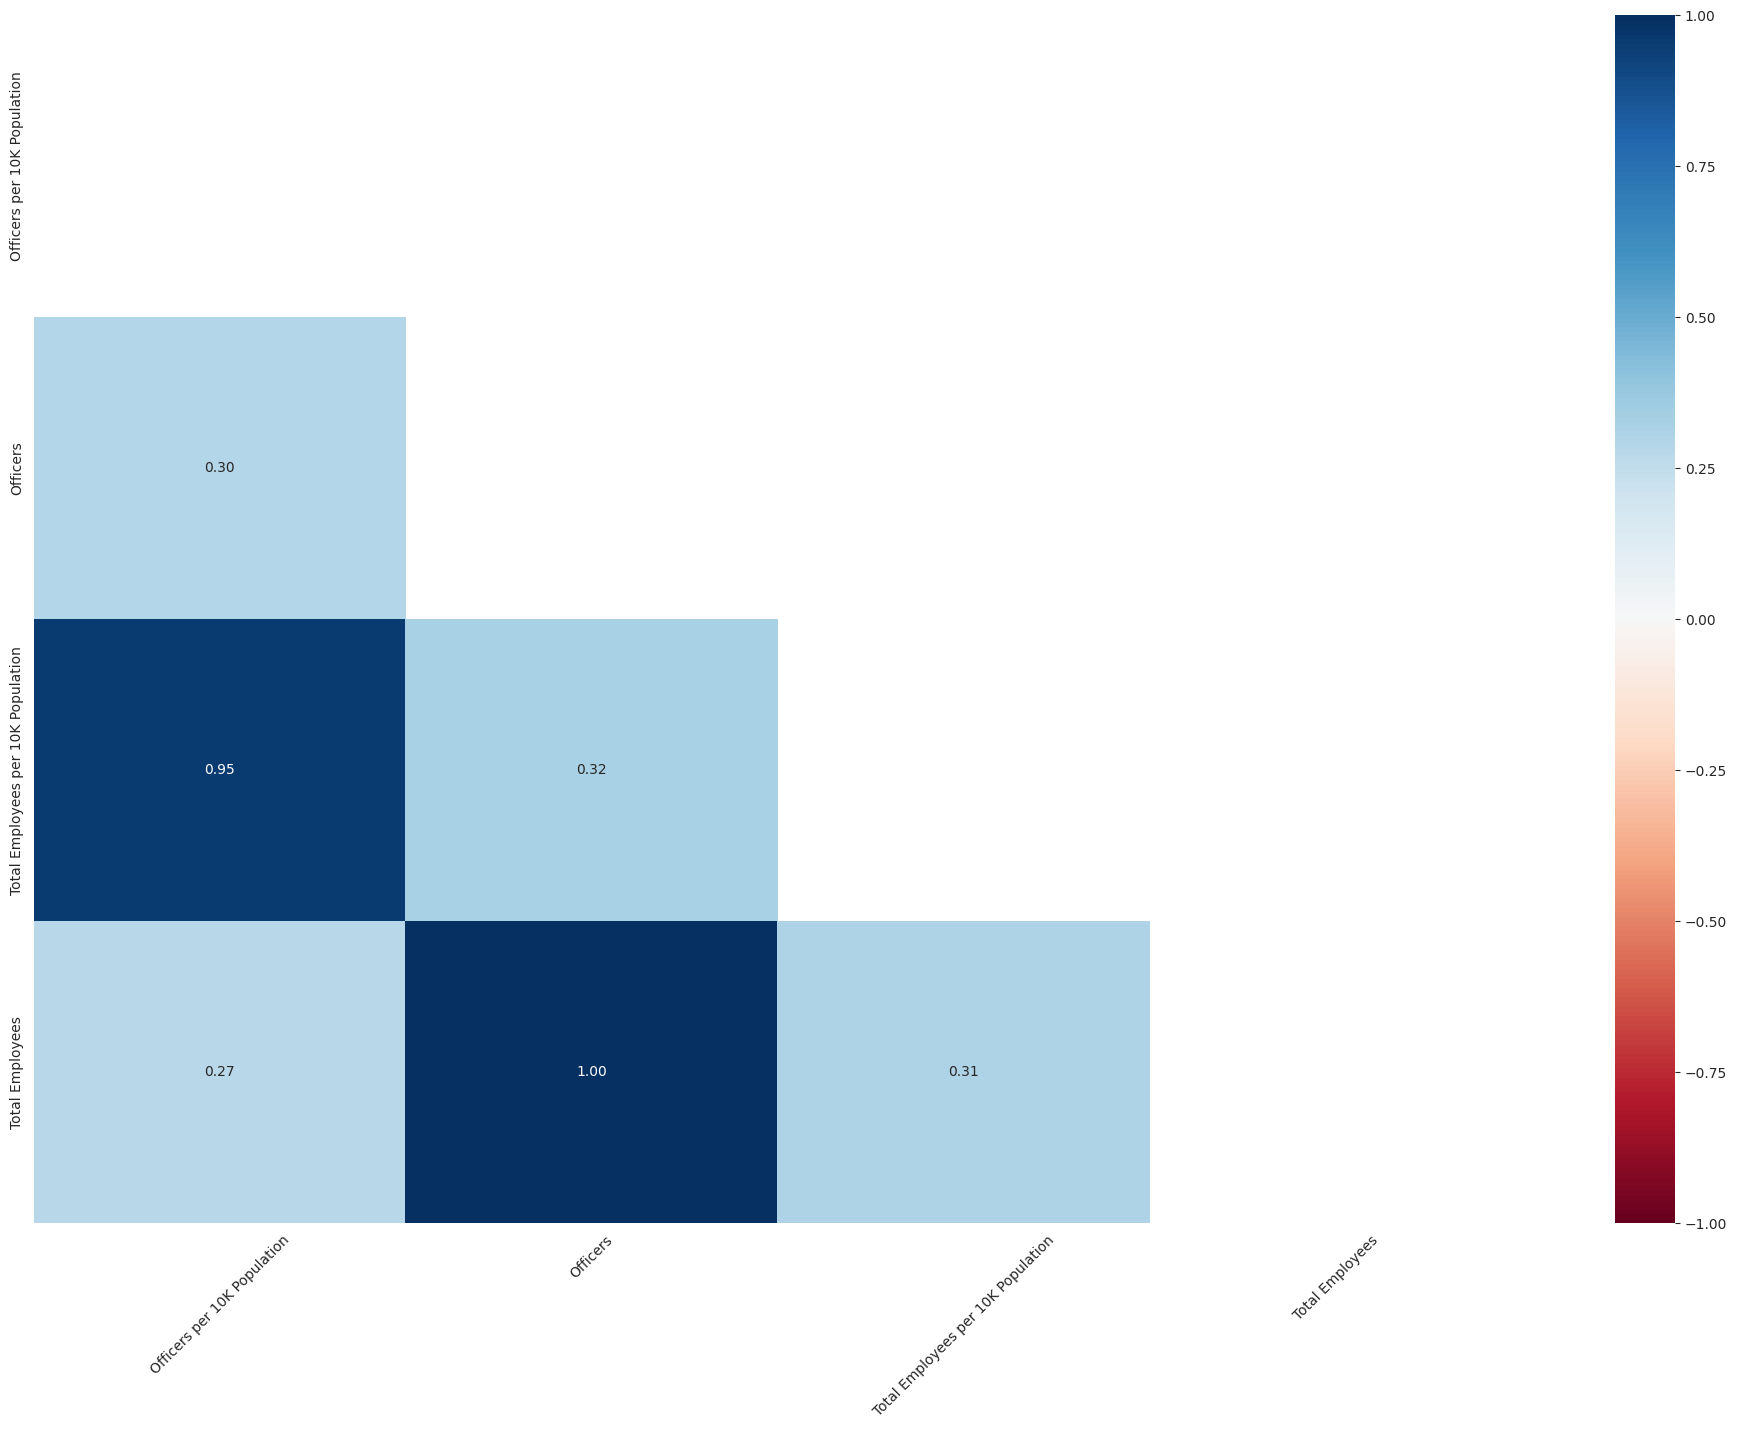

In [24]:
%matplotlib inline
matrix = np.triu(table_MN[3].corr())
fig,ax = plt.subplots(figsize=(24, 16),dpi=100)
sns.heatmap (table_MN[3].corr(), annot=True, ax=ax, fmt='.2f', vmin=-1, vmax=1, center=0,mask=matrix, cmap='RdBu')
plt.xticks(rotation = 45);

**2.Oyun teorisi, dijital pazarlamada katma değer yaratabilir mi? Yaratabileceğini düşünüyorsanız olası kullanım alanları neler
olabilir, tartışınız.**

Oyun Teorisi’nin tanımı; rekabet, belirsizlik ve bilgi eksikliği varken başarıya ulaşmak adına optimum strateji arayışına odaklanan bir uygulamalı matematik dalı olarak verilebilir. Dolayısıyla da tüm sektörlerde ve disiplinlerde görülen rekabet ve çatışma hâllerinde karar alma ve modellemenin matematikte karşılık geldiği alandır.
Oyun teorisi, sosyal bilimler için geliştirilmiş olan ilk ve tek matematiksel araçtır.

Yani; olabilecekleri hesaplayarak adımlar atmak. Özellikle iki birey ya da toplu bilinç arasındaki ilişki için kullanımı faideli olur diyebiliriz.

Ancak bence yukarıdaki tanıma pazarlama’da da kullanılabileceğini eklemek gerekli. Hatta bencenin icerisinin makalelerle desteklenen bir bence oldugunu soylemek gerekir.
 
Makaleler incelendiginde digital pazarlama da oyun teorisinin etkili oldugu gorulur. Aslinda degisen dunya ile birlikte pazarlama sekli digitale kaymis , sokak oyunlari online a tasinmis oyuncular degismistir.
 

Uygulama alanı olarak karşımıza çıkan oyun teorisi, eğitim ve sağlık başta olmak üzere; pazarlama, halkla ilişkiler, reklam, ekonomi, eğlence,  toplumsal  değişim,  çalışan  performansı, inovasyon,  rehabilitasyon,  iş  verimliliği, kaynak ve zaman yönetimi, liderlik, medya sektörü ve gazetecilik, psikoloji, dijital bilgi sistemleri, spor ve turizm gibi yaşamın birçok farklı alanında kullanılmaktadır (Burke, 2014; Deterding vd., 2011; Ferrer ve Karlsson, 2015; Juárez ve Carballo, 2016; Kapp, 2012; Mora vd., 2017; Pamfilie vd., 2016; Vardarlıer ve İnan, 2017).
 
Oyun Teorisi  daha  kapsamlı  bir  bakışla; profesyonel gelişim ve  büyümeyi, kişisel verimliliği ve  üretkenliği, öğrenme ya da eğitim kalitesini, aktif katılımı, uzun vadeli sadakati, etkileşimi ve ilişkileri arttırmak için çalışanları motive etmede oyun tasarımını, yapısını ve  mekaniklerini kullanan bir  süreç olarak tanımlamaktadır. Böylece çalışanların deneyimleri, paylaşımları ve verimlilikleri saf bir eğlence ortamı vasıtasıyla arttırılmaktadır.
Tanımlardan da görülebileceği üzere, oyunlaştırma pek çok disiplinin penceresinden tanımlanmasına rağmen, bazı ortak temalar dikkat çekmektedir. Bunlar arasında; kullanıcıların bağlılık ve motivasyon düzeylerini arttırmak, oyun  dışı bağlamlar (Tunga  ve  İnceoğlu, 2016: 270), sürece dahil olma isteği oluşturup  bunu  sürdürmek,  süreci  eğlenceli hale  getirmek,  bilgileri  paylaşmak,  yeni deneyimler  ve beceriler edinmek, çalışanlar arasında rekabete dayalı iş birliği sağlamak (Uskov ve Sekar, 2015: 34-35) yer almaktadır.
 
Dolayisiyla temelinde rekabet olan, adimlarinizi karsinizdakinin hamlesi ile belirlediginiz her yere oyun teorisini uygulayabilirsiniz.  


**3.E-ticarette kullanıcı davranışı modelleme konusunda, kullanılacak metrikler,algoritma, istatistiki yaklaşımlar vs dahil olmak
üzere bir analiz fikri sununuz.**

**Kullanilacak metrikler,**
Aylık satış sayısı
Ortalama sepet tutarı
Kar marjı
Site üzerindeki toplam işlem hacmi
Ürün maliyetleri
Çapraz satış yapılacak ürünler
Stok yönetimi
Geri dönüşüm oranları
Ziyaretçi başına gelir
Rakiplerin fiyatlandırma stratejileri
Müşteri edinme maliyeti

**Algoritma **
 Machine Learning algorithmalari, deep learning algoritmalari, NLP kullanilabilir. Bunun yaninda matemaktiksel operation research algorithmalari kullanabilir. Bunlar tamamem sirketin butcesi ve teknolojiye  olan ilgi ve alakasi ile baglantilidir.

 **Istatistiki Yaklasimlar**
  Bu da isletmenin kullandigi yontem ve butce ile ilgilidir. Spps uzerinden analizlerde yapabilir. Anova testleri, chi kare testi gibi testleri kullanabilir. Yada bunlari python gibi open source uzerinden butun analizleride yaptirabilir.

 E ticarette kullanici davranislarini neler etkilemektedir.
 kisinin karakteri
 cevrenin karakteri
 saticinin kararlari
 satici kontrol sistemi
 Marketing gibi uyaranlar

 Bu bilgiler isiginda customer segmentation ve customer churn gibi problemleri arastirir Machine Learning algoritmalrini ,k means ile clustering yapilabilir.Dolayisiyla python ve kutuphanleri ile hem metriclerimi belirlemis, algotritmami kullanmis ve istatistiki yaklasimlarimi uygulamis olurum..

 Yani chort analizi , cumtomer segemntation analizi, RFM, CRM ler kullanilarak bunlarin ML deki , DL deki algoritmalari kullanilarak analizler yapilabilir. 

Aslinda ben data science kismini sevme sebebim her hangi bir projeyi biraz deneyim ile baska bir projeye implement edebiliyorsunuz. Mesela kullanici davranisi modellemede ML in recommender sistemlerinden yararlanabilirsiniz. size kullanici davranislari ile ilgili bilgi verir. 